# Decision Tree
### ID3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import collections

# Entropy
**S = -sum(p(X)log2p(X))**

**plot a image of -(x\*log2(x)+(1-x)\*log2(1-x))**

when x is 1 or (1-x) is 1, the S will close to 0

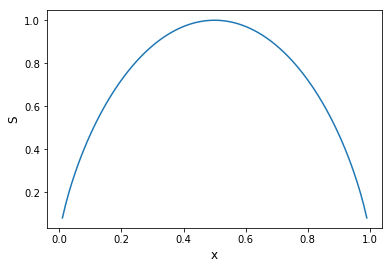

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(0, 100)/100
x = x[1:]
ax.plot(x, -(x*np.log2(x)+(1-x)*np.log2(1-x)))
plt.xlabel('x', fontsize = 'large')
plt.ylabel('S', fontsize = 'large')
plt.show()

In [3]:
def calc_entropy(labels):
    m = len(labels)
    labelcounts = collections.Counter(labels)
    entropy = 0
    for key in labelcounts:
        prob = labelcounts[key]/m
        entropy -=prob*np.log2(prob)
    return entropy

In [4]:
dataset = np.array([[1, 1], [1, 1], [1, 0], [0, 1], [0, 0]])
labels = np.array(['yes', 'yes', 'no', 'no', 'no'])
feature_name = np.array(['no surfacing', 'flippers'])

In [5]:
calc_entropy(labels)

0.97095059445466858

In [6]:
collections.Counter(labels)

Counter({'no': 3, 'yes': 2})

## Split dataset

In [7]:
def split_dataset(dataset, axis, value, labels):
    new_dataset = dataset[dataset[:, axis] == value]
    new_dataset = np.delete(new_dataset, axis, 1) #delete the feature from the dataset
    new_labels = labels[dataset[:, axis] == value]
    return new_dataset, new_labels

In [8]:
split_dataset(dataset, 0 ,1, labels)

(array([[1],
        [1],
        [0]]), array(['yes', 'yes', 'no'], 
       dtype='<U3'))

## Choose best feature index

In [9]:
def choose_best_feature(dataset, labels):
    n = len(dataset[0])
    base_ent = calc_entropy(labels)
    best_feature = -1
    best_info_gain = 0
    for i in range(n):
        new_ent = 0.
        for value in set(dataset[:, i]):
            new_labels = labels[dataset[:, i] == value]
            new_ent += len(new_labels) / len(labels) * calc_entropy(new_labels) #add all the entropy
        info_gain = base_ent - new_ent
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature = i
    return best_feature

In [10]:
choose_best_feature(dataset, labels)

0

## Create Tree

In [11]:
def create_tree(dataset, labels, feature_name):
    assert len(dataset[0]) == len(feature_name)
    assert len(dataset) == len(labels)
    if len(set(labels)) == 1:
        return labels[0]
    if len(dataset[0]) == 0:
        return collections.Counter(labels).most_common(1)[0][0]
    best_feature = choose_best_feature(dataset, labels)
    if best_feature == -1:
        return collections.Counter(labels).most_common(1)[0][0]
    best_feat_name = feature_name[best_feature]
    feature_name = np.delete(feature_name, best_feature)
    my_tree = {best_feat_name:{}}
    for value in set(dataset[:, best_feature]):
        sub_dataset, sub_labels = split_dataset(dataset, best_feature, value, labels)
        my_tree[best_feat_name][value] = create_tree(sub_dataset, sub_labels, feature_name) #go to create the next node
    return my_tree

In [12]:
mytree = create_tree(dataset, labels, feature_name)

In [13]:
mytree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [14]:
list(mytree)

['no surfacing']

## Make classify 

In [15]:
def classify(x, tree, feat_name):
    first_key = list(tree.keys())[0] #get the best feature name in this node
    sec_dict = tree[first_key] #get the value of this node
    feat_index = list(feat_name).index(first_key)
    for key in sec_dict.keys():
        if x[feat_index] == key:
            if type(sec_dict[key]).__name__ == 'dict': #go to the next node
                class_label = classify(x, sec_dict[key], feat_name)
            else: class_label = sec_dict[key]
    return class_label

In [16]:
classify(np.array([1,1]), mytree, feature_name)

'yes'

In [17]:
feature_name == 'no surfacing'

array([ True, False], dtype=bool)

## Store tree

In [18]:
import pickle
def store_tree(tree, filename):
    f = open(filename, 'wb')
    pickle.dump(tree, f)
    f.close()

def grab_tree(filename):
    f = open(filename, 'rb')
    return pickle.load(f)

In [19]:
store_tree(mytree, 'tree')

In [20]:
grab_tree('tree')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## A example for decide which type of lenses is suitable for a people

In [21]:
def load_dataset(filename):
    fr = open(filename)
    dataset = [line.strip().split('\t') for line in fr.readlines()]
    dataset = np.array(dataset)
    features = dataset[:, :-1]
    labels = dataset[:, -1]
    feature_name = ['age', 'prescript', 'astigmatic', 'tearRate']
    return features, feature_name, labels

In [22]:
features, feature_name, labels = load_dataset('lenses.txt')

In [23]:
lenses_tree = create_tree(features, labels, feature_name)

In [24]:
lenses_tree

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

**draw a tree (this function is copy from the internet)**

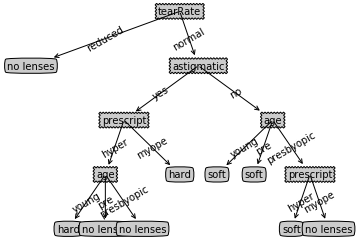

In [25]:
import treePlotter
treePlotter.createPlot(lenses_tree)